In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import logging
snscolors = sns.color_palette("colorblind")
from chainconsumer import Chain, ChainConsumer, Truth
import cosmicfishpie.analysis.fishconsumer as fco
from cosmicfishpie.analysis import fisher_matrix as cf
from cosmicfishpie.analysis import fisher_plot_analysis as cfa

# Table of Contents

[Obtain parameters from Fisher Matrix](#obtain-parameters-from-fisher-matrix)

[Load Nautilus chains](#load-nautilus-chains)

[Plot Nautilus chains vs. Fisher Matrix](#plot-nautilus-chains-vs-fisher-matrix)

[Plot and compare all](#plot-and-compare-all)

# Obtain parameters from Fisher matrix

In [2]:
fisher_matrix_file = './GWresults/CosmicFish_v1.2.5_cosmicjellyfish_Euclid-ISTF-Pess-GCphoto_symb_GW_GCph_fishermatrix.txt'

In [3]:
fisher_GCph = cf.fisher_matrix(file_name=fisher_matrix_file)

In [4]:
param_names = fisher_GCph.get_param_names()
print(param_names)

['omch2', 'ombh2', 'h', 'ns', '10^9As', 'b0']


In [5]:
fishers_to_analyze = cfa.CosmicFish_FisherAnalysis(fisher_list=[fisher_GCph])

In [6]:
fishers_to_analyze.compare_fisher_results()

----
Fisher Name:  CosmicFish_v1.2.5_cosmicjellyfish_Euclid-ISTF-Pess-GCphoto_symb_GW_GCph_fishermatrix
Fisher FoM in omch2,ombh2: 234606.350
Parameter omch2     , fiducial:    0.112, 1-sigma error:   0.0061, percent error:      5.5%
Parameter ombh2     , fiducial:    0.022, 1-sigma error:   0.0025, percent error:     11.1%
Parameter h         , fiducial:    0.674, 1-sigma error:   0.0218, percent error:      3.2%
Parameter ns        , fiducial:    0.966, 1-sigma error:   0.0132, percent error:      1.4%
Parameter 10^9As    , fiducial:    2.420, 1-sigma error:   0.0898, percent error:      3.7%
Parameter b0        , fiducial:    1.000, 1-sigma error:   0.0093, percent error:      0.9%


# Load Nautilus chains

In [7]:
chain_file = 'GWresults/cosmicjellyfish_Euclid-ISTF-Pess-GCphoto_symb_GW.txt'
## Fisher matrix was computed together with the GCph MCMC, so we use the same parameters
photo_chain = fco.load_Nautilus_chains_from_txt(filename=chain_file, param_cols=param_names)

In [8]:
# Print first 3 rows of the chain to verify
photo_chain.head(3)

,omch2,ombh2,h,ns,10^9As,b0,weight,posterior
1792,0.114488,0.023483,0.660609,0.942529,2.080332,1.107996,4.940656e-324,-752.785674
1795,0.103187,0.023675,0.696345,0.972950,2.488103,1.071693,1.351694e-294,-684.509534
1801,0.124809,0.029709,0.678323,0.922113,2.870890,0.913123,1.135102e-281,-654.750564


In [9]:
truth_values = fisher_GCph.get_param_names_fiducial_dict()
truth_values

{'omch2': np.float64(0.112),
 'ombh2': np.float64(0.02249),
 'h': np.float64(0.6737),
 'ns': np.float64(0.96605),
 '10^9As': np.float64(2.42),
 'b0': np.float64(1.0)}

In [10]:
param_labels_latex = ['$\\omega_c$', '$\\omega_b$', 
                '$h$', '$n_{\\rm s}$', 
                '$10^9 A_s$', '$b_0$']

param_labels = {param: label for param, label in zip(param_names, param_labels_latex)}
param_labels

{'omch2': '$\\omega_c$',
 'ombh2': '$\\omega_b$',
 'h': '$h$',
 'ns': '$n_{\\rm s}$',
 '10^9As': '$10^9 A_s$',
 'b0': '$b_0$'}

# Plot Nautilus chains vs. Fisher Matrix

Plot saved to: ./GWresults/cosmicjellyfish-GCph-EuclidISTF.png


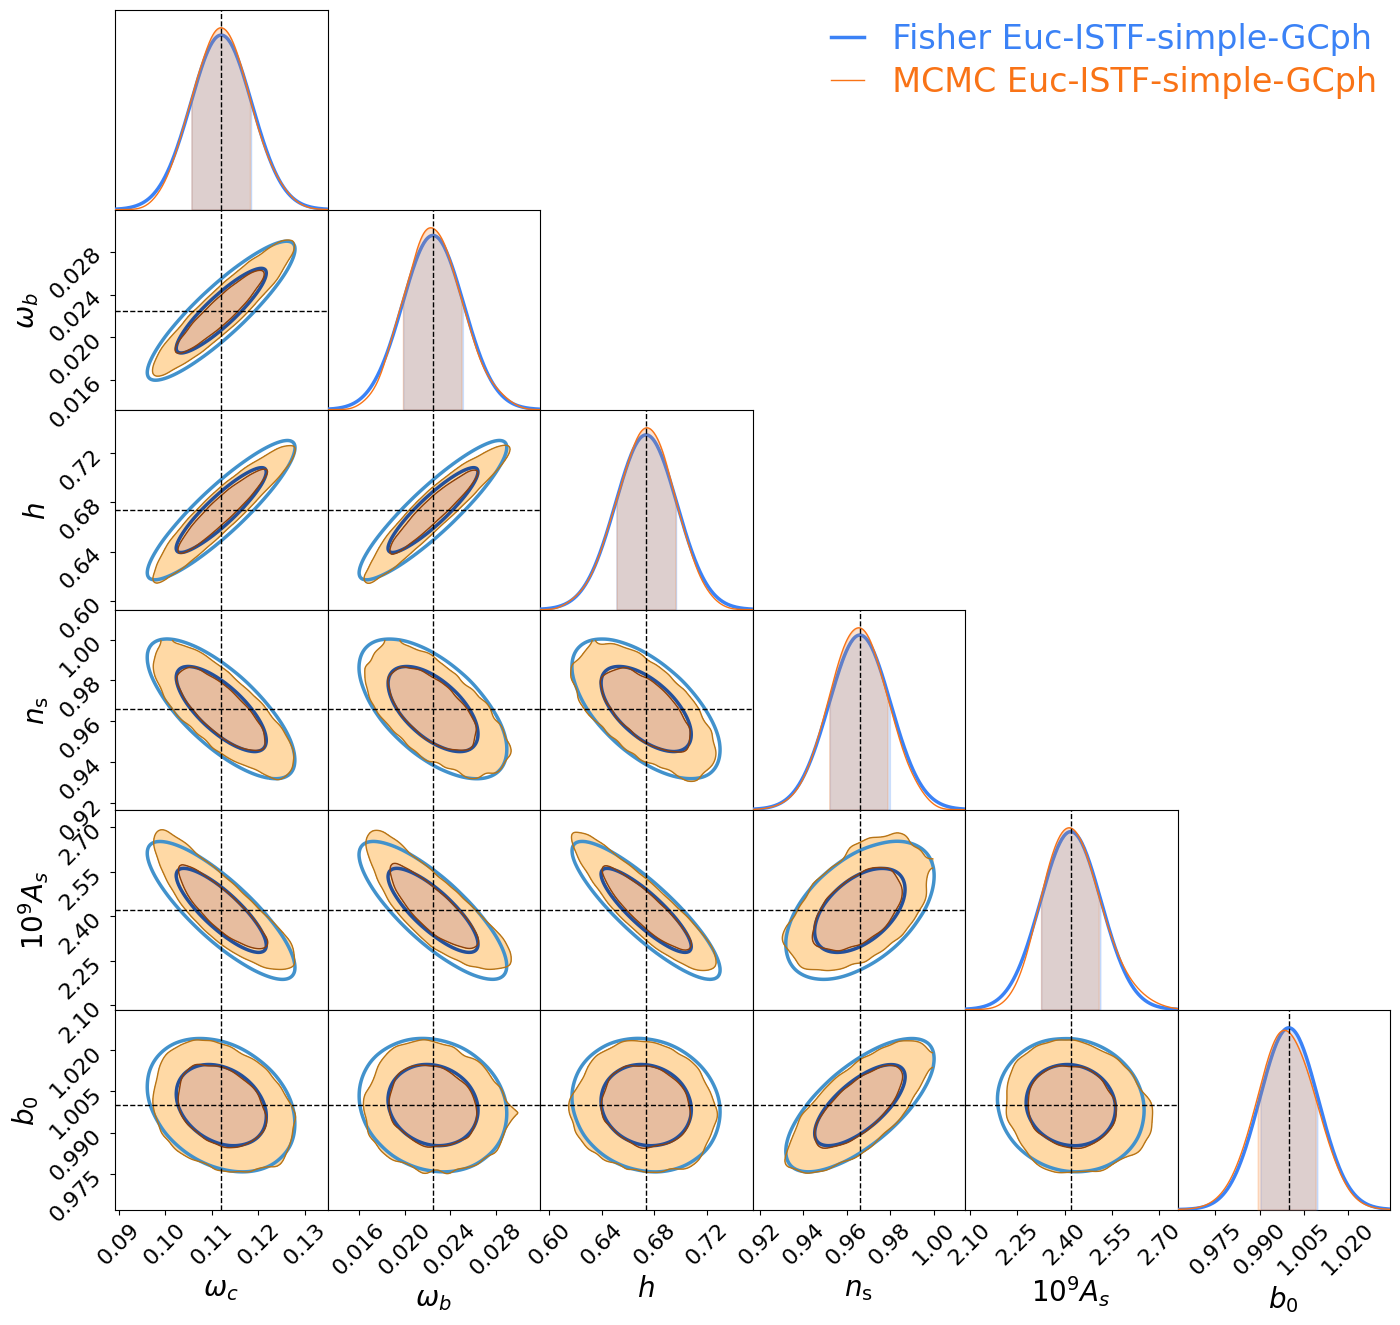

In [11]:
contour_plot_chains_fisher = fco.make_triangle_plot(
    chains=[photo_chain],
    fishers=[fisher_GCph],
    colors=[
        'blue',
        'orange' 
        ],
    chain_labels=[
        'MCMC Euc-ISTF-simple-GCph'
        ],
    fisher_labels=[
        'Fisher Euc-ISTF-simple-GCph'
        ],
    truth_values=truth_values,
    params=param_names,
    smooth=10,
    bins=15,
    param_labels=param_labels,
    label_font_size=20,
    tick_font_size=16,
    legend_kwargs={"fontsize": 24},
    savefile='./GWresults/cosmicjellyfish-GCph-EuclidISTF.png'
)
#euclid_photo_fig.show()

Plot saved to: ./GWresults/cosmicjellyfish-GCph-EuclidISTF-summary.png


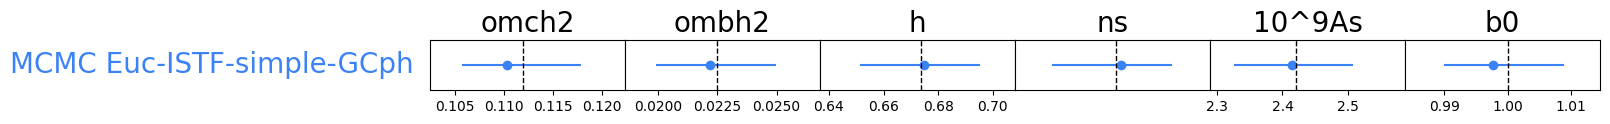

In [12]:
cc, fig_summary = fco.plot_chain_summary(chains=[photo_chain],
                                     chain_names=['MCMC Euc-ISTF-simple-GCph'],
                                     truth_values=truth_values,
                                     output_file='./GWresults/cosmicjellyfish-GCph-EuclidISTF-summary.png',
                                     blind_params=['ns'],
                                     plot_config_kwargs={"label_font_size": 20, 
                                                         "tick_font_size": 20}) 

In [13]:
#%%latex
print(cc.analysis.get_latex_table(transpose=True))

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{cc}
        \hline
		Parameter & MCMC Euc-ISTF-simple-GCph \\ 
		\hline
		omch2 & $\left( 110.4^{+7.5}_{-4.7} \right) \times 10^{-3}$ \\ 
		ombh2 & $\left( 22.2^{+2.8}_{-2.3} \right) \times 10^{-3}$ \\ 
		h & $0.675^{+0.021}_{-0.024}$ \\ 
		10^9As & $2.415^{+0.092}_{-0.088}$ \\ 
		b0 & $\left( 997.7^{+11.1}_{-7.9} \right) \times 10^{-3}$ \\ 
		\hline
    \end{tabular}
\end{table}


# Plot and compare all

In [14]:
rescale = lambda x: x/100.0 # for 100*ombh2
montepython_chain = fco.load_montepython_chains(base_path='./GWresults/dark_sirens/',
                                          chain_root='2025-08-04_5000000_',
                                          num_chains=8,
                                          param_names_conversion_dict={
                                              'omega_b':'100*ombh2',
                                              'omega_cdm':'omch2',
                                              'n_s':'ns',
                                              'A_s' :'10^9As',
                                              'bias_GC_1':'b0'
                                          },
                                          derived_params={'ombh2': ('100*ombh2', rescale)}
                                          )

Successfully read truth values for 8 parameters
Loading chain from ./GWresults/dark_sirens/2025-08-04_5000000__1.txt
Loading chain from ./GWresults/dark_sirens/2025-08-04_5000000__2.txt
Loading chain from ./GWresults/dark_sirens/2025-08-04_5000000__3.txt
Loading chain from ./GWresults/dark_sirens/2025-08-04_5000000__4.txt
Loading chain from ./GWresults/dark_sirens/2025-08-04_5000000__5.txt
Loading chain from ./GWresults/dark_sirens/2025-08-04_5000000__6.txt
Loading chain from ./GWresults/dark_sirens/2025-08-04_5000000__7.txt
Loading chain from ./GWresults/dark_sirens/2025-08-04_5000000__8.txt
Added truth value for derived parameter ombh2: 0.02249


In [15]:
montepython_chain.head(3) # Print first 3 rows of the chain to verify

,weight,posterior,100*ombh2,omch2,ns,10^9As,h,b0,ombh2
0,4.0,2.85630,2.187197,0.109423,0.970398,2.445799,0.663899,1.008238,0.021872
1,2.0,4.05348,2.187197,0.109423,0.970398,2.445799,0.663899,1.007334,0.021872
2,1.0,5.36311,2.136701,0.108341,0.973396,2.448132,0.659523,1.009799,0.021367


Plot saved to: ./GWresults/GCph-EuclidISTF-vs-MontePython.png


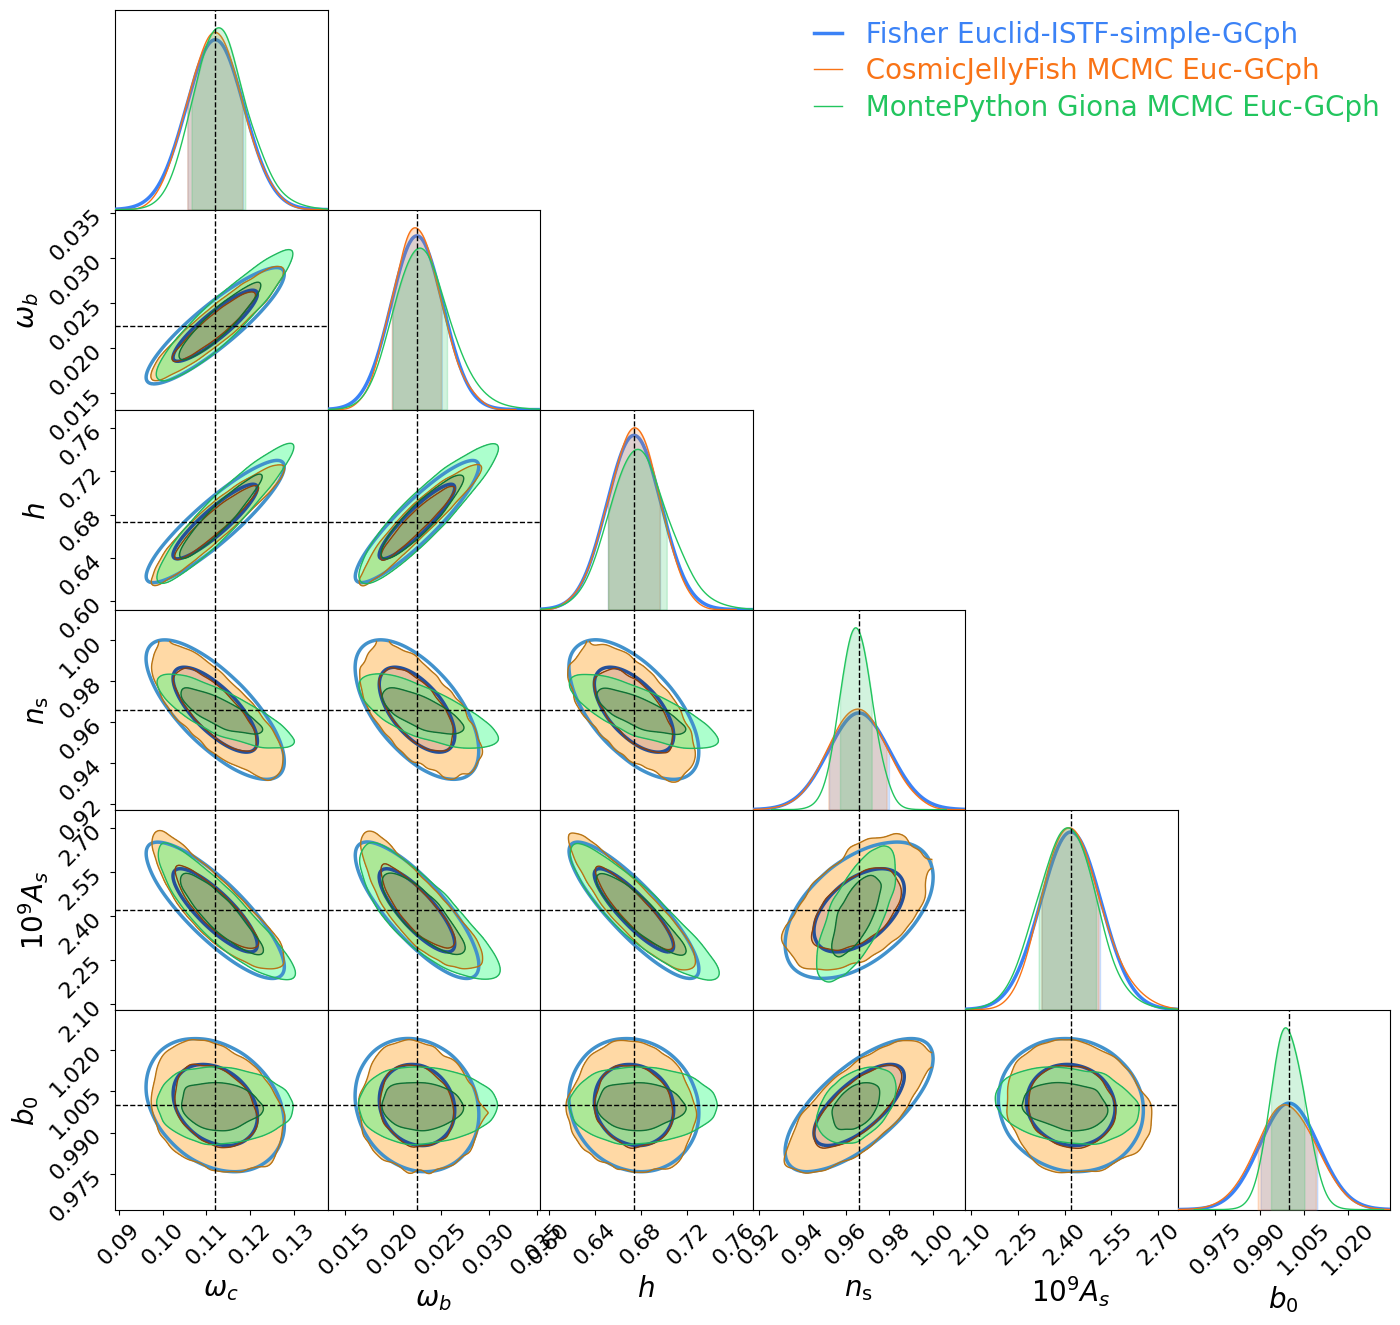

In [16]:
%matplotlib inline
euclid_photo_fig = fco.make_triangle_plot(
    chains=[photo_chain, montepython_chain],
    fishers=[
        fisher_GCph
        ],
    colors=[
        'blue',
        'orange',
        'green' 
        ],
    chain_labels=[
        'CosmicJellyFish MCMC Euc-GCph',
        'MontePython Giona MCMC Euc-GCph'
        ],
    fisher_labels=[
        'Fisher Euclid-ISTF-simple-GCph'
        ],
    truth_values=truth_values,
    params=param_names,
    smooth=10,
    #kde=1.1,
    bins=15,
    param_labels=param_labels,
    label_font_size=20,
    tick_font_size=16,
    savefile='./GWresults/GCph-EuclidISTF-vs-MontePython.png'
)
#euclid_photo_fig.show()

Plot saved to: ./GWresults/GCph-EuclidISTF-vs-MontePython-summary.png


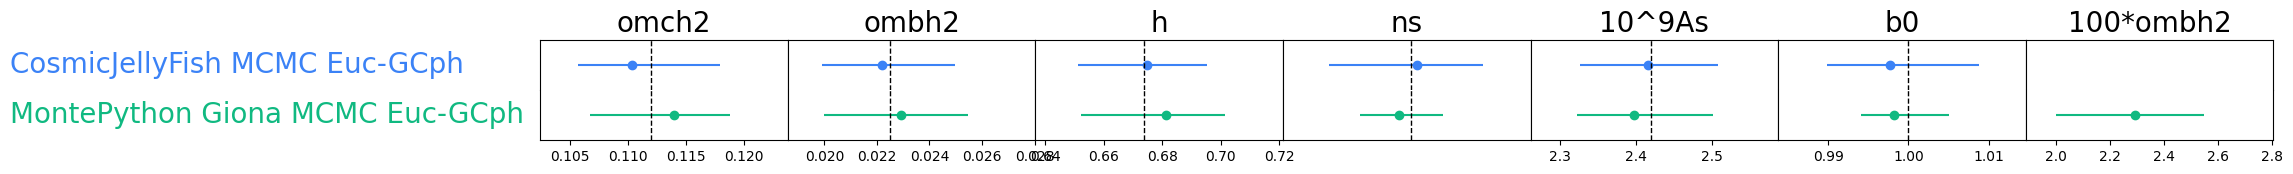

In [17]:
cc, fig_summary = fco.plot_chain_summary(chains=[photo_chain, montepython_chain],
                                     chain_names=['CosmicJellyFish MCMC Euc-GCph', 'MontePython Giona MCMC Euc-GCph'],
                                     truth_values=truth_values,
                                     output_file='./GWresults/GCph-EuclidISTF-vs-MontePython-summary.png',
                                     blind_params=['ns'],
                                     plot_config_kwargs={"label_font_size": 20, 
                                                         "tick_font_size": 20})

In [18]:
print(cc.analysis.get_latex_table(transpose=True))

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{ccc}
        \hline
		Parameter & CosmicJellyFish MCMC Euc-GCph & MontePython Giona MCMC Euc-GCph \\ 
		\hline
		omch2 & $\left( 110.4^{+7.5}_{-4.7} \right) \times 10^{-3}$ & $\left( 113.9^{+4.9}_{-7.2} \right) \times 10^{-3}$ \\ 
		ombh2 & $\left( 22.2^{+2.8}_{-2.3} \right) \times 10^{-3}$ & $\left( 22.9^{+2.5}_{-2.9} \right) \times 10^{-3}$ \\ 
		h & $0.675^{+0.021}_{-0.024}$ & $0.681^{+0.020}_{-0.029}$ \\ 
		10^9As & $2.415^{+0.092}_{-0.088}$ & $2.397^{+0.104}_{-0.075}$ \\ 
		b0 & $\left( 997.7^{+11.1}_{-7.9} \right) \times 10^{-3}$ & $\left( 998.2^{+6.8}_{-4.1} \right) \times 10^{-3}$ \\ 
		100*ombh2 & -- & $2.29^{+0.25}_{-0.29}$ \\ 
		\hline
    \end{tabular}
\end{table}
